# insights
Investigating the effects of each electoral process

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import electoral_processes as ep

In [151]:
import warnings
warnings.filterwarnings('ignore')

In [152]:
ep.Voter.reset_ids()
population = ep._get_voters("ElectoralProcesses/",n_voters=10000,n_opinions=2, population_num=1)
nominees   = ep.choose_candidates(population, 2, 10) 

In [153]:
elected_gen = ep.general_election(population, nominees)
elected_rc  = ep.ranked_choice_voting(population, nominees)
print(elected_gen.id, elected_rc.id)

3358.0 2397.0


In [154]:
happiness_gen = ep.calculate_happiness(population, elected_gen)
happiness_rc  = ep.calculate_happiness(population, elected_rc)

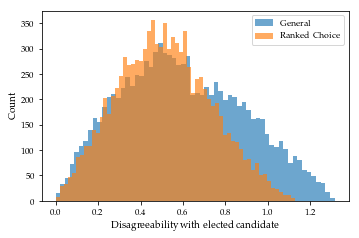

In [155]:
plt.hist(happiness_gen, label="General", bins=60,alpha=0.65,fill='stepfill')
plt.hist(happiness_rc, label="Ranked Choice",bins=60,alpha=0.65,fill='stepfill')
plt.legend()
plt.ylabel("Count")
plt.xlabel("Disagreeability with elected candidate")
plt.savefig("figs/rc-gen_disaggreability_distrib.pdf")
plt.show()

### For 2-d opinion space:

In [156]:
opinion1, opinion2 = zip(*[v.opinions for v in population])

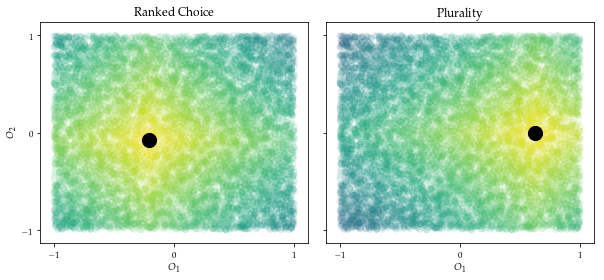

In [175]:
cm = plt.cm.get_cmap('viridis_r')

#f#ig = plt.figure(figsize=(16,8))
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8.5,4), sharey=True)
sc = ax1.scatter(opinion1, opinion2, c=happiness_rc, vmax=2,alpha=0.1, cmap=cm)
sc = ax2.scatter(opinion1, opinion2, c=happiness_gen, vmax=2,alpha=0.1, cmap=cm)

ax1.scatter(*elected_rc.opinions, label='Elected',s=200,color='k')
ax2.scatter(*elected_gen.opinions, label='Elected',s=200,color='k')

#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.12, 0.001, 0.8, 0.03])
#cbar = fig.colorbar(sc, ticks=[0,2], orientation='horizontal', cax=cbar_ax)
#cbar.set_label('Disagreeability')

ax1.set_xlabel(r"$O_1$")
ax1.set_ylabel(r"$O_2$")
ax2.set_xlabel(r"$O_1$")

ax1.set_xticks(np.arange(-1,1.1,1))
ax1.set_yticks(np.arange(-1,1.1,1))
ax2.set_xticks(np.arange(-1,1.1,1))
ax2.set_yticks(np.arange(-1,1.1,1))
ax1.set_title("Ranked Choice")
ax2.set_title("Plurality")
#ax1.legend()
plt.tight_layout()
plt.savefig("figs/rc-gen_anecdotal_comparison-2D.pdf",bbox_inches='tight')
plt.show()

### For 3-d opinion space:

In [145]:
ep.Voter.reset_ids()
population = ep._get_voters("ElectoralProcesses/",n_voters=10000,n_opinions=3, population_num=1)
nominees   = ep.choose_candidates(population, 3, 10) 

In [146]:
elected_gen = ep.general_election(population, nominees)
elected_rc  = ep.ranked_choice_voting(population, nominees)
print(elected_gen.id, elected_rc.id)

98.0 8102.0


In [147]:
happiness_gen = ep.calculate_happiness(population, elected_gen)
happiness_rc  = ep.calculate_happiness(population, elected_rc)

/Applications/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Applications/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


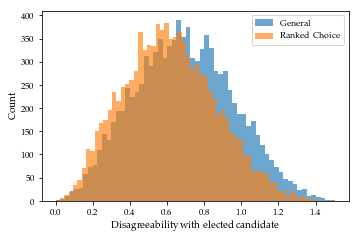

In [148]:
plt.hist(happiness_gen, label="General", bins=60,alpha=0.65,fill='stepfill')
plt.hist(happiness_rc, label="Ranked Choice",bins=60,alpha=0.65,fill='stepfill')
plt.legend()
plt.ylabel("Count")
plt.xlabel("Disagreeability with elected candidate")
#plt.savefig("figs/rc-gen_disaggreability_distrib.pdf")
plt.show()

In [149]:
opinion1, opinion2, opinion3 = zip(*[v.opinions for v in population])

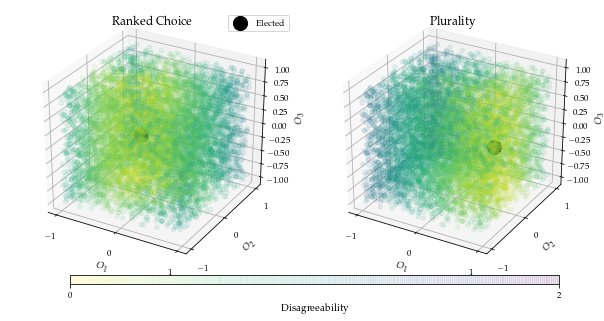

In [173]:
# 3D version
cm = plt.cm.get_cmap('viridis_r')

#f#ig = plt.figure(figsize=(16,8))
#fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4), sharey=True)
fig = plt.figure(figsize=(8.5,4))
ax1 = fig.add_subplot(1,2,1, projection='3d')
ax2 = fig.add_subplot(1,2,2, projection='3d')

sc = ax1.scatter(opinion1, opinion2, opinion3, c=happiness_rc, alpha=0.1, vmax=2, cmap=cm, zorder=1)
sc = ax2.scatter(opinion1, opinion2, opinion3, c=happiness_gen, alpha=0.1, vmax=2, cmap=cm, zorder=1)

ax1.scatter(*elected_rc.opinions, label='Elected',s=200,color='k',zorder=2)
ax2.scatter(*elected_gen.opinions, label='Elected',s=200,color='k',zorder=2)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.12, 0.001, 0.8, 0.03])
cbar = fig.colorbar(sc, ticks=[0,2], orientation='horizontal', cax=cbar_ax)
cbar.set_label('Disagreeability')

ax1.set_xlabel(r"$O_1$")
ax1.set_ylabel(r"$O_2$")
ax1.set_zlabel(r"$O_3$")
ax2.set_xlabel(r"$O_1$")
ax2.set_ylabel(r"$O_2$")
ax2.set_zlabel(r"$O_3$")

ax1.set_xticks(np.arange(-1,1.1,1))
ax1.set_yticks(np.arange(-1,1.1,1))
ax2.set_xticks(np.arange(-1,1.1,1))
ax2.set_yticks(np.arange(-1,1.1,1))
ax1.set_title("Ranked Choice")
ax2.set_title("Plurality")
ax1.legend()
plt.tight_layout()
plt.savefig("figs/rc-gen_anecdotal_comparison-3D.pdf",bbox_inches='tight')
plt.show()

In [81]:
ls

ElectoralProcesses/     electoral_processes.py
__pycache__/            insights.ipynb


In [80]:
import numpy as np
import pickle
import glob

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rc

# make figures better:
font = {'weight':'normal','size':11}
rc('font',**{'family':'serif','serif':['Palatino']})
rc('figure', figsize=(5.5,3.5))
rc('text', usetex=True)
#rc('xtick.major', pad=10) # xticks too close to border!
rc('xtick', labelsize=9)
rc('ytick', labelsize=9)
rc('legend',**{'fontsize':9})

In [129]:
#    get average satisfation for every population 
#        for each transparency level, for each voting system
V_systems = ['general','ranked','approval']
V_systems2label = {'general':"Plurality",'ranked':"Ranked-Choice",'approval':"Approval"}
happ_dist_files = {}
#uncomment once all voting systems are run
#for V in V_systems:
#    happ_dist_files[V] = glob.glob('ElectoralProcesses/{V}/*')
happ_dist_files['general'] = glob.glob('ElectoralProcesses/general/*')

transparencies = [1,2,3,4,5,6,7]
happ_avgs = {V:{T:[] for T in transparencies} for V in happ_dist_files}
for Vsys in happ_dist_files:
    for t in transparencies:
        for fname in [f for f in happ_dist_files[Vsys] if '_T{:02}_'.format(t) in f]:
            with open(fname,'rb') as file:
                diss_dist = pickle.load(file)
                happ_dist = [(2-diss)/2 for diss in diss_dist]
                #happ_dist = [(2-diss) for diss in diss_dist]
                happ_mean = np.mean(happ_dist)
                happ_avgs[Vsys][t].append(happ_mean)


            

_T01_
_T02_
_T03_
_T04_
_T05_
_T06_
_T07_


/Applications/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


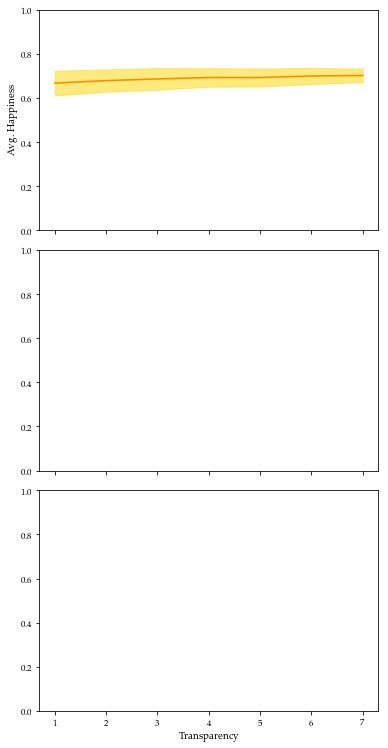

In [130]:
# subplot version of transparency plot
f, axes = plt.subplots(3,1,figsize=(5.5,10.5),sharex=True)  
for i,V in enumerate(happ_avgs):
    t_avgs = [np.mean(happ_avgs[V][t]) for t in transparencies]
    t_std = [np.std(happ_avgs[V][t]) for t in transparencies]
    
    axes[i].plot(transparencies,t_avgs,color='darkorange',label='Average over {} populations'.format(len(happ_avgs[V][1])))
    axes[i].fill_between(transparencies,t_avgs,[u+1.96*s for u,s in zip(t_avgs,t_std)],alpha=0.5, color='gold')
    axes[i].fill_between(transparencies,t_avgs,[u-1.96*s for u,s in zip(t_avgs,t_std)],alpha=0.5, color='gold',label='95% CI')
    axes[i].set_ylim(0,1)
    axes[i].set_ylabel('Avg. Happiness')
plt.xlabel('Transparency')    
plt.tight_layout()
plt.show()


/Applications/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


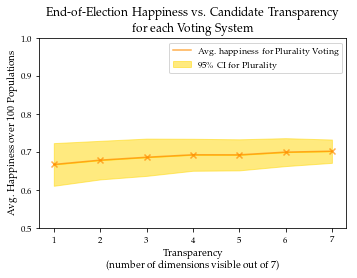

In [135]:
# sameplot version of transparency plot
cpairs = [('darkorange','gold'),('crimson','plum'),('darkslategrey','paleturquoise')]
plt.figure()  
for i,V in enumerate(happ_avgs):
    t_avgs = [np.mean(happ_avgs[V][t]) for t in transparencies]
    t_std = [np.std(happ_avgs[V][t]) for t in transparencies]
    plt.scatter(transparencies,t_avgs,
                marker = 'x',color= cpairs[i][0],alpha=0.7,zorder=4)
    plt.plot(transparencies,t_avgs,
             color= cpairs[i][0],alpha=0.7,
             label='Avg. happiness for {} Voting'.format(V_systems2label[V]))
    plt.fill_between(transparencies,t_avgs,[u+1.96*s for u,s in zip(t_avgs,t_std)],
                     alpha=0.5,color= cpairs[i][1])
    plt.fill_between(transparencies,t_avgs,[u-1.96*s for u,s in zip(t_avgs,t_std)],
                     alpha=0.5,color= cpairs[i][1],
                     label='95\% CI for {}'.format(V_systems2label[V]))
plt.ylim(0.5,1)
plt.ylabel('Avg. Happiness over 100 Populations')
plt.xlabel('Transparency \n(number of dimensions visible out of 7)')    
plt.legend(loc='best')
plt.title('End-of-Election Happiness vs. Candidate Transparency \nfor each Voting System')
plt.show()
